**INDICE------------------------------------------------------------------------------------------** <a id='back'></a>

* [Introducción.](#intro)
* [Paso 1. Análisis exploratorio de datos.](#paso1)
    * [1.1 importar los archivos.](#paso1-1)
    * [1.2 estudiar los datos.](#paso1-2)
    * [1.3 asegurarte de que los tipos de datos sean correctos.](#paso1-3)
    * [1.4 identificar los 10 principales barrios en términos de finalización del recorrido.](#paso1-4)
    * [1.5 Gráficos: empresas de taxis y número de viajes,](#paso1-5)
* [Paso 2.Prueba de hipótesis.](#paso2)
* [Paso 3. Conclusiones.](#paso3)

<a id='intro'></a>
#  *   Introducción

La  empresa Zuber, es una nueva asociación de viajes compartidos que se está lanzando en Chicago. Se nos ha solicitado la tarea de encontrar patrones en la información disponibles, con el fin de facilitar los procesos de mejora continua en la empresa. El objetivo de este proyecto es comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes. De esa manera aportar herramientas de desición para que la empresa eliga una estrategia de crecimiento.

Se cuenta con una base de datos, en ella se analizarán los datos de los competidores y se formulará una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

Descripción de los datos

Una base de datos con información sobre viajes en taxi en Chicago:

* __tabla neighborhoods: datos sobre los barrios de la ciudad__
 * name: nombre del barrio
 * neighborhood_id: código del barrio
* __tabla cabs: datos sobre los taxis__
 * cab_id: código del vehículo
 * vehicle_id: ID técnico del vehículo
 * company_name: la empresa propietaria del vehículo
* __tabla trips: datos sobre los viajes__
 * trip_id: código del viaje
 * cab_id: código del vehículo que opera el viaje
 * start_ts: fecha y hora del inicio del viaje (tiempo redondeado a la hora)
 * end_ts: fecha y hora de finalización del viaje (tiempo redondeado a la hora)
 * duration_seconds: duración del viaje en segundos
 * distance_miles: distancia del viaje en millas
 * pickup_location_id: código del barrio de recogida
 * dropoff_location_id: código del barrio de finalización
* __tabla weather_records: datos sobre el clima__
 * record_id: código del registro meteorológico
 * ts: fecha y hora del registro (tiempo redondeado a la hora)
 * temperature: temperatura cuando se tomó el registro
 * description: breve descripción de las condiciones meteorológicas, por ejemplo, "lluvia ligera" o "nubes dispersas"

Esquema de la tabla

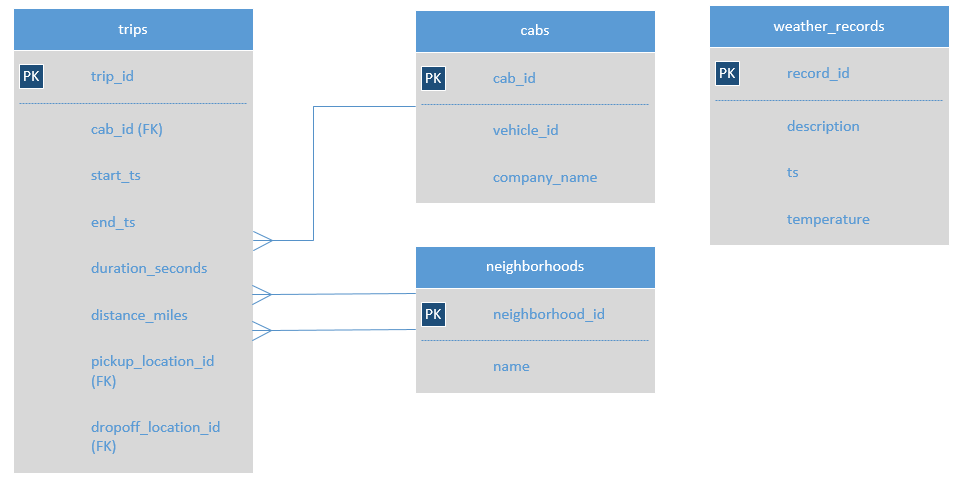

Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:

El Archivo __/datasets/project_sql_result_01.csv__. contiene los siguientes datos:
* company_name: nombre de la empresa de taxis
* trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

El Archivo __/datasets/project_sql_result_04.csv__. contiene los siguientes datos:
* dropoff_location_name: barrios de Chicago donde finalizaron los viajes
* average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

# <a id=paso1></a>
##  . Análisis exploratorio de datos.

.<a id=paso1-1></a>
###  importar los archivos.

In [355]:
# importación de librerias
# Cargar todas las librerías
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import statistics
import math
from datetime import datetime

import numpy as np

from scipy.stats import gamma
from typing import List
from scipy import stats as st

# import important module
import datetime
from datetime import datetime

In [356]:
#procedemos a importar los datos y 
#abrir el archivo de la información correspondiente a las compañias de taxis
taxis = pd.read_csv('/datasets/project_sql_result_01.csv')
#veamos la estructura de esta tabla
print('ESTRUTURA DE LA TABLA COMPAÑIAS DE TAXIS')
taxis.info()
print()
#procedemos a importar los datos y 
#abrir el archivo refente a la información de los destinos de la ciudad de Chicago
barrios = pd.read_csv('/datasets/project_sql_result_04.csv')
#veamos la estructura de esta tabla
print('ESTRUTURA DE LA TABLA DESTINOS DE CADA VIAJE')
barrios.info()
print()
#creamos un dataFrame para poder cotejar la información de los viajes 
#los sábados y con trayecto Loop--->OHare
print('ESTRUTURA DE LA TABLA DE LOS VIAJES QUE COMENZARON EN EL LOOP EL SÁBADO Y TERMINARON EN O´HARE')
viajes_sabado =  pd.read_csv('/datasets/project_sql_result_07.csv')
viajes_sabado.info()

ESTRUTURA DE LA TABLA COMPAÑIAS DE TAXIS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

ESTRUTURA DE LA TABLA DESTINOS DE CADA VIAJE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

ESTRUTURA DE LA TABLA DE LOS VIAJES QUE COMENZARON EN EL LOOP EL SÁBADO Y TERMINARON EN O´HARE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-

.<a id=paso1-1></a>
###  estudiar los datos.

Verificando valores ausentes para la tabla barrios.

In [357]:
# calculando valores ausentes
barrios.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

Verificando valores ausentes para la tabla taxis.

In [358]:
# calculando valores ausentes
taxis.isna().sum()

company_name    0
trips_amount    0
dtype: int64

Verificando valores ausentes para la tabla viajes_sabado.

In [359]:
# calculando valores ausentes
viajes_sabado.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

Ahora que no tenemos valores ausentes, es el momento de examinar los datos de cada tabla y ver que tanta información con errores puedan tener.

In [360]:
# observemos si hay valores en cero o negativos en el número de viajes de cada compañía de taxis
taxis.loc[taxis['trips_amount'] <= 0 ]

,company_name,trips_amount


In [361]:
# observemos si hay valores en cero o negativos en el el promedio de viajes
print(barrios.loc[barrios['average_trips'] <= 0 ])

Empty DataFrame
Columns: [dropoff_location_name, average_trips]
Index: []


In [362]:
#listado de valores de la variable average_trips
barrios['average_trips'].value_counts()

1212.066667    1
14.166667      1
32.166667      1
19.466667      1
2420.966667    1
              ..
22.600000      1
12.266667      1
33.103448      1
1259.766667    1
15.166667      1
Name: average_trips, Length: 94, dtype: int64

In [363]:
#listado de valores de la variable company_name
taxis['company_name'].value_counts()

6574 - Babylon Express Inc.                1
Leonard Cab Co                             1
3556 - 36214 RC Andrews Cab                1
Choice Taxi Association                    1
5997 - 65283 AW Services Inc.              1
                                          ..
Star North Management LLC                  1
Norshore Cab                               1
Dispatch Taxi Affiliation                  1
Patriot Taxi Dba Peace Taxi Association    1
City Service                               1
Name: company_name, Length: 64, dtype: int64

In [364]:
#listado de valores de la variable trips_amount
taxis['trips_amount'].value_counts()

14       3
29       3
7        2
21       2
33       2
15       2
8448     1
4383     1
9299     1
978      1
1607     1
1486     1
5        1
5953     1
210      1
2235     1
9181     1
3175     1
19558    1
428      1
402      1
1259     1
10367    1
230      1
31       1
1775     1
1014     1
250      1
1404     1
310      1
37       1
2216     1
20       1
3        1
7455     1
3355     1
8        1
11       1
12       1
13       1
16       1
146      1
147      1
7701     1
39       1
2070     1
5015     1
25       1
27       1
11422    1
1296     1
9888     1
1955     1
36       1
2        1
127      1
Name: trips_amount, dtype: int64

In [365]:
#listado de valores de la variable duration_seconds
viajes_sabado['duration_seconds'].value_counts()

1380.0    41
1260.0    35
1440.0    29
1320.0    23
1200.0    23
          ..
2123.0     1
1391.0     1
1436.0     1
1984.0     1
1211.0     1
Name: duration_seconds, Length: 495, dtype: int64

In [366]:
#Revista para verificar que el DataFrame no haya
#registros duplicados para el dataframe barrios
barrios.duplicated().sum()

0

In [367]:
#Revista para verificar que el DataFrame no haya
#registros duplicados para el dataframe taxis
taxis.duplicated().sum()

0

In [368]:
#Revista para verificar que el DataFrame no haya
#registros duplicados para el dataframe viajes hechos los sábados con trayecto LOOP --->O´HARE
viajes_sabado.duplicated().sum()

197

Vamos a idenficar los datos duplicados con una visualización

In [369]:
#creando un dataframe
duplicateViajes_sabado = viajes_sabado[viajes_sabado.duplicated()]

#Observando los datos duplicados
duplicateViajes_sabado

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


In [370]:
#eliminado los registro duplicados
viajes_sabado = viajes_sabado.drop_duplicates()

In [371]:
#verificamos que ya no haya valores duplicados
viajes_sabado.duplicated().sum()

0

Podemos concluir que ni hay valores duplicados ni raros en las viajes_sabado, tablas taxis y barrios.

.<a id=paso1-3></a>
###  asegurarte de que los tipos de datos sean correctos.

In [372]:
#cambiamos el tipo de datos para poder potenciar su uso en un análisis gráfico
taxis['company_name'] = taxis['company_name'].astype('string')
taxis['company_name'].dtypes


StringDtype

In [373]:
#cambiamos el tipo de datos para poder potenciar su uso en un análisis gráfico
barrios['dropoff_location_name'] = barrios['dropoff_location_name'].astype('string')
barrios['dropoff_location_name'].dtypes

StringDtype

In [374]:
#cambiamos el tipo de datos para poder potenciar su uso en un análisis estadístico
viajes_sabado['weather_conditions'] = viajes_sabado['weather_conditions'].astype('string')
viajes_sabado['weather_conditions'].dtypes

StringDtype

In [375]:
#cambiamos el tipo de datos para poder potenciar su uso en un análisis estadístico
viajes_sabado['start_ts'] =  pd.to_datetime(viajes_sabado['start_ts'], format='%Y-%m-%d %H:%M:%S')
viajes_sabado['start_ts'].dtypes

dtype('<M8[ns]')

.<a id=paso1-4></a>
### identificar los 10 principales barrios en términos de finalización del recorrido.

Presentamos el listado y a continuación un gráfico de barras para mejorar la visualización de estos datos.

In [376]:
#cambianos el indice para obtener la información y no las claves numéricas del índice
barrios.set_index("dropoff_location_name", drop = True,  append=True, inplace = True)
barrios = barrios.sort_values(by = 'average_trips', 
                              ascending= False)
barrios.head(10)

,,average_trips
,dropoff_location_name,
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333


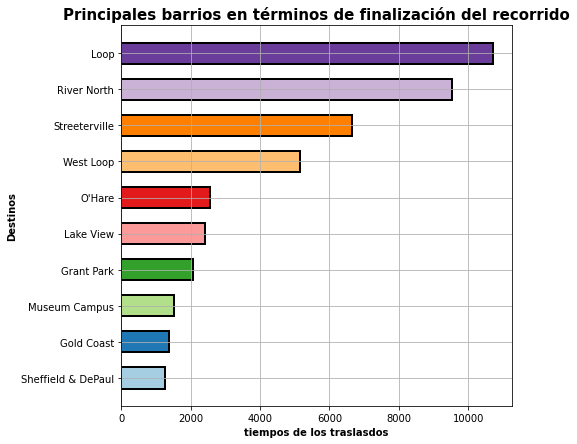

In [377]:
# Presentando los datos de las dos variables del gráfico 
# con solo los 10 primeros lugares


barrios10 = ["Sheffield & DePaul", "Gold Coast", "Museum Campus", "Grant Park", "Lake View",
             "O'Hare", "West Loop", "Streeterville", "River North", "Loop"]    
average_trips=[1259.766667, 1364.233333, 1510.000000, 2068.533333, 2420.966667,
               2546.900000, 5163.666667, 6664.666667, 9523.666667, 10727.466667 ]    
    
plt.figure(figsize=[7, 7])
col_map = plt.get_cmap('Paired')

# hacemos la declaración del gráfico horizontal
plt.barh(barrios10, average_trips, height=0.6, color=col_map.colors, 
         edgecolor='k', linewidth=2)

plt.title('Principales barrios en términos de finalización del recorrido', fontsize=15, fontweight ='bold')
plt.xlabel('tiempos de los traslasdos', fontsize=10, fontweight ='bold')
plt.ylabel('Destinos', fontsize=10, fontweight ='bold')
plt.grid(True)
plt.show() 

En el gráfico de arriba se observa, que los principales destinos que destacan sobre las demas son:

 * Loop
 * River North
 * Streeteville
 * West Loop
 
 Todas arriba de los 4000 viajes en promedio.

.<a id=paso1-5></a>
### Gráfico: empresas de taxis y número de viajes.

In [378]:
#cambianos el indice para obtener la información y no las claves numéricas del índice
taxis.set_index("company_name", inplace = True)
taxis = taxis.sort_values(by = 'trips_amount', 
                         ascending=False)
taxis.head(10)

,trips_amount
company_name,
Flash Cab,19558
Taxi Affiliation Services,11422
Medallion Leasing,10367
Yellow Cab,9888
Taxi Affiliation Service Yellow,9299
Chicago Carriage Cab Corp,9181
City Service,8448
Sun Taxi,7701
Star North Management LLC,7455


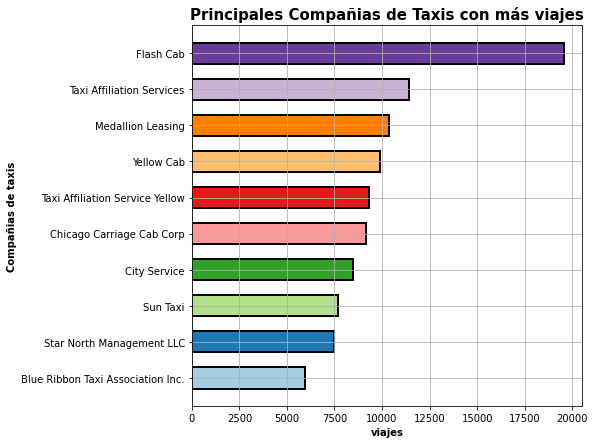

In [379]:
# Presentando los datos de las dos variables del gráfico 
# con solo las 10 primeras compañias de taxis
                 
taxis10 = ["Blue Ribbon Taxi Association Inc.", "Star North Management LLC", "Sun Taxi", "City Service",
           "Chicago Carriage Cab Corp", "Taxi Affiliation Service Yellow", "Yellow Cab", "Medallion Leasing",
           "Taxi Affiliation Services", "Flash Cab"]
trips_amount = [5953, 7455, 7701, 8448, 9181, 9299, 9888, 10367, 11422, 19558]

plt.figure(figsize=[7, 7])
col_map = plt.get_cmap('Paired')

# hacemos la declaración del gráfico horizontal
plt.barh(taxis10, trips_amount, height=0.6, color=col_map.colors, 
         edgecolor='k', linewidth=2)

plt.title('Principales Compañias de Taxis con más viajes', fontsize=15, fontweight ='bold')
plt.xlabel('viajes', fontsize=10, fontweight ='bold')
plt.ylabel('Compañias de taxis', fontsize=10, fontweight ='bold')
plt.grid(True)
plt.show() 

En el gráfico de arriba podemos observar una clara preferencia porla compañia "Flash Cab", sobre sus demás competidoras.

Es importante destacar que los datos del dataFrame '*taxis*' los datos solo reflejan los de los días 15 y 16 de Noviembre. Y entre tanto los datos del dataFrame '*barrios*' contemplan todo el mes de Noviembre del 2017.

<a id=paso2></a>
##  . Prueba de hipótesis. 

Como estamos buscando confirmar si, en la media de la muestra de los viajes cambio, podemos afirmar que tenemos un caso de hipótesis sobre la igualdad de las medias de dos muestras.

Por lo que podemos ver, para los dos planes la media parece estar muy coincidente. Aunque ¿Lo será esta diferencia que vemos estadísticamente significativa?. 

Realicemos una prueba de hipótesis para contestar a esta pregunta. Usemos la notación $\mu_{\text{lluvia}}$ para denotar la media de los registros que tienen lluvia y $\mu_{\text{sin lluvia}}$ para denotar la media de los registros en donde hay lluvia en los viajes.

1. Nuestras hipótesis a plantear serán:

$H_0: \mu_{\text{lluvia}} = \mu_{\text{sin lluvia}}$

$H_a: \mu_{\text{lluvia}} \neq \mu_{\text{sin lluvia}}$

2. Establezcamos un nivel de significancia del 5%.

3. Seleccionemos un estadístico de prueba.

Para que sea confiable el uso del estadístico debemos obtener una muestra de mas datos, la teoría nos dice de al menos 30 valores. Vamos a usar los datos de la consultas SQL, realizadas previa capturadas anteriormente. Se obtendrán los suficientes para la cantidad de registros que necesita esta prueba.

Si en el apartado **3.3 Descripción de las distribuciones** asumimos que la distribución de la variable "ingreso promedio" es del tipo Gamma, entonces deberiamos escoger un estadístico basado en la distribución Gamma; más sin embargo la gráfica anterior nos muestra una tendencia de las funciones de distribución a comportarse como distribuciones del tipo Normal.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con el planteamiento de hipótesis.
</div>

Recordando la consulta realizada sobre los viajes hechos los días de sábado y con trayecto de Loop hacia O' Hare.

In [380]:
#dataframe con los datos de la consulta en SQL
viajes_sabado

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1060,2017-11-04 14:00:00,Good,2700.0
1061,2017-11-18 16:00:00,Bad,2186.0
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0


In [381]:
#realizamos la partición del DataFrame uno con los dias lluviosos y otro
#sin dias lluviosos
viajes_sabado_sin_lluvia =  viajes_sabado.loc[viajes_sabado['weather_conditions'] == 'Good', 
                                              'duration_seconds']
viajes_sabado_11uvia = viajes_sabado.loc[viajes_sabado['weather_conditions'] == 'Bad', 
                                         'duration_seconds']

alpha = 0.05 # el nivel de significancia estadística crítica
# si el valor p es menor que alfa, rechazamos la hipótesis

results = st.ttest_ind(viajes_sabado_sin_lluvia, viajes_sabado_11uvia)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula") 

p-value:  7.397770692813604e-08
Rechazamos la hipótesis nula


<a id=paso3></a>
##  . Conclusiones.

Se realizó una exploración de los registro de una base de datos que preserva la información de los viajes de en el area de la ciudad de Chicago, solicitados atravez de diversas compañias de taxis.

Está información fué recolectada con el propósito, de analizar evidencia que de sustento de patrones de comportamiento de los clientes que reciben el servicio de taxi urbano.

Posteriormente se amplio el análisis de la muestra de viajes con dos dataframes que resguardaban la información en uno de los numeros de viajes hechos por cada compañia durante el mes de Noviembre 2017.
De igual forma para el otro dataframe pero con la información de los barrios destino de la ciudad de Chicago.

Se depuro registros duplicados, de tres dataframes. Además de comprobar la inexistencia de datos nulos y raros.

Posteriormente se analizó por separado la información de cada DataFrame, para los tres siguientes:
* barrios-que contiene la información de los destinos y número de veces aparecido en los registros -
* taxis -que contiene la información de los diversas compañias con los números de viajes hechos durante el mes de noviembre.
* viajes_sabado -con la información de los viajes registrados cada sábado con origen en el barrio LOOP y destino en el barrio OHARE.

Se depuro los registros duplicados si era el caso, junto con la busqueda de las existencias de valores nulos.

Se procede a registrar cuales son las compañias con más viajes en el periodo de tiempo de los días de Noviembre del 2017. Después se estableció mismo objetivo para los registros de la tabla destinos por viajes, obteniendo los barrios con mucho mas destinos elegidos por viaje. Lo anterior usando gráficos de barras para visualizar la información y observar los primeros lugares.

Por último se formulo un análisis estadístido a manera de hipotesís. De la muestra obtenida de viajes los dias sabados con destino en Ohare y salida en Loop. Encontrando influencia en el clima en la duración de los viajes.

**RECOMENDACIONES**
+ Las empresas que lider en Noviembre 2017 fue con supremacia 'Flash Cab'. Se debe buscar profundizar porque la empresa logró tal resultado, ¿será mayor flotilla que la de sus competidores?; se recomienda buscar enfocar los esfuerzos de alianza con tal compañia para favorecer a los clientes.
+ Los destinos mas solicitados en Noviembre 2017 fuerón Loop, River North, Streeteville, West Loop. Se recomienda armar estrategias de venta para personas que viven en esos barrio.
+ Devido a que los viajes si son influidos por las condiciones climáticas, hay que recomendar ala empresa que realice sus promociones buscando un análisis previo de los reportes del clíma.


[Volver a Contenidos](#back)